# Site analytics


## Load data

[Data downloaded from Read the Docs](https://app.readthedocs.org/dashboard/computing-in-context/traffic-analytics/), where this site is hosted. [Documentation.](https://docs.readthedocs.io/en/stable/traffic-analytics.html)


In [1]:
import pandas as pd

analytics = pd.read_csv("assets/data/readthedocs_traffic_analytics_computing-in-context_2024-09-15_2024-12-14.csv")
analytics

<frozen importlib._bootstrap>:491: RuntimeWarning: The global interpreter lock (GIL) has been enabled to load module 'pandas._libs.pandas_parser', which has not declared that it can run safely without the GIL. To override this behavior and keep the GIL disabled (at your own risk), run with PYTHON_GIL=0 or -Xgil=0.


,Date,Version,Path,Views
0,2024-12-14 00:00:00,latest,/lecture_15.html,1
1,2024-12-14 00:00:00,latest,/index.html,3
2,2024-12-14 00:00:00,latest,/lab_12.html,1
3,2024-12-13 00:00:00,latest,/notebooks.html,1
4,2024-12-13 00:00:00,latest,/lecture_20.html,1
...,...,...,...,...
1112,2024-10-21 00:00:00,latest,/index.html,28
1113,2024-10-20 00:00:00,latest,/project_1.html,1
1114,2024-10-20 00:00:00,latest,/index.html,9
1115,2024-10-20 00:00:00,latest,/lecture_15.html,1


## Cleaning


In [2]:
analytics.dtypes

Date       object
Version    object
Path       object
Views       int64
dtype: object

In [3]:
analytics["Date"] = pd.to_datetime(analytics["Date"])
analytics

,Date,Version,Path,Views
0,2024-12-14,latest,/lecture_15.html,1
1,2024-12-14,latest,/index.html,3
2,2024-12-14,latest,/lab_12.html,1
3,2024-12-13,latest,/notebooks.html,1
4,2024-12-13,latest,/lecture_20.html,1
...,...,...,...,...
1112,2024-10-21,latest,/index.html,28
1113,2024-10-20,latest,/project_1.html,1
1114,2024-10-20,latest,/index.html,9
1115,2024-10-20,latest,/lecture_15.html,1


Ensure legend and x axis are in order.


In [4]:
analytics = analytics.sort_values(["Path", "Date"])

Only include real pages.


In [5]:
html_only = analytics["Path"].str.endswith(".html")
no_redirects = ~analytics["Path"].str.startswith("/redirects/")
analytics = analytics[html_only & no_redirects]

## Pageviews per day by page


In [6]:
def add_important_dates(fig):
    # https://github.com/plotly/plotly.py/issues/3065#issuecomment-778652215

    # https://bulletin.columbia.edu/sipa/registration/
    fig.add_vline(
        x=datetime(2024, 11, 18).timestamp() * 1000,
        line_dash="dash",
        annotation_text="Registration start",
    )
    fig.add_vline(
        x=datetime(2024, 12, 3).timestamp() * 1000,
        line_dash="dash",
        annotation_text="Test",
    )

[Fix rendering:](https://computing-in-context.afeld.me/notebooks.html#jupyter-book)


In [7]:
import plotly.io as pio

pio.renderers.default = "notebook_connected+plotly_mimetype"

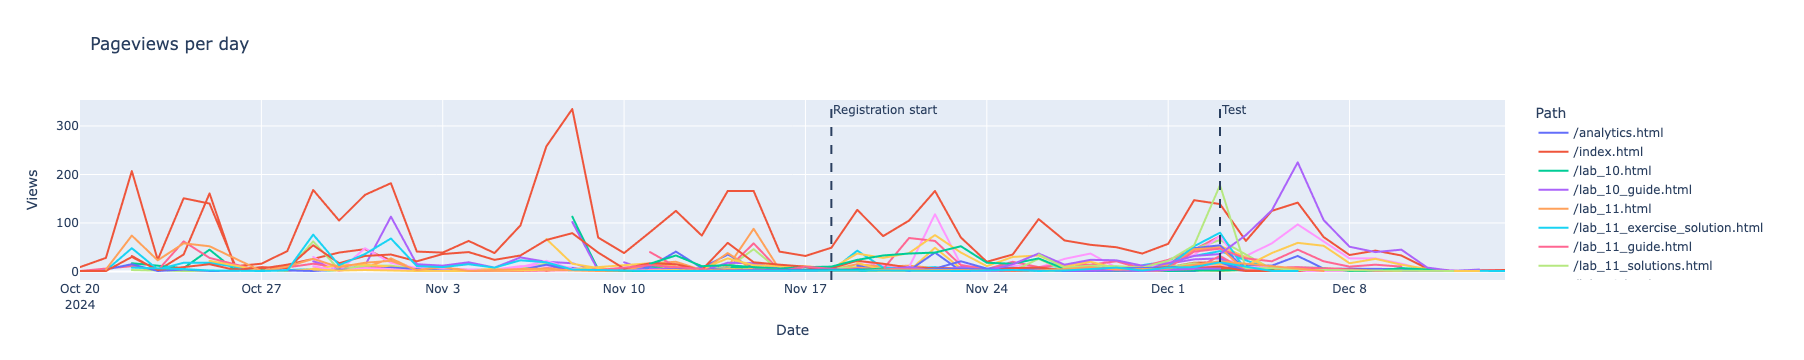

In [8]:
import plotly.express as px
from datetime import datetime

fig = px.line(
    analytics,
    x="Date",
    y="Views",
    color="Path",
    title="Pageviews per day",
)
add_important_dates(fig)
fig.show()

## Site-wide pageviews per day


In [9]:
def aggregate_by(df, offset):
    aggregated = df.resample(offset, on="Date").sum()

    # only keep relevant column
    aggregated = aggregated[["Views"]]
    # don't include the last period of the dataset, as it's incomplete and thus misleadingly low
    aggregated = aggregated.iloc[:-1]

    return aggregated

In [10]:
views_by_day = aggregate_by(analytics, "D")
views_by_day

,Views
Date,
2024-10-20,12
2024-10-21,39
2024-10-22,445
2024-10-23,59
2024-10-24,350
2024-10-25,484
2024-10-26,21
2024-10-27,42
2024-10-28,80


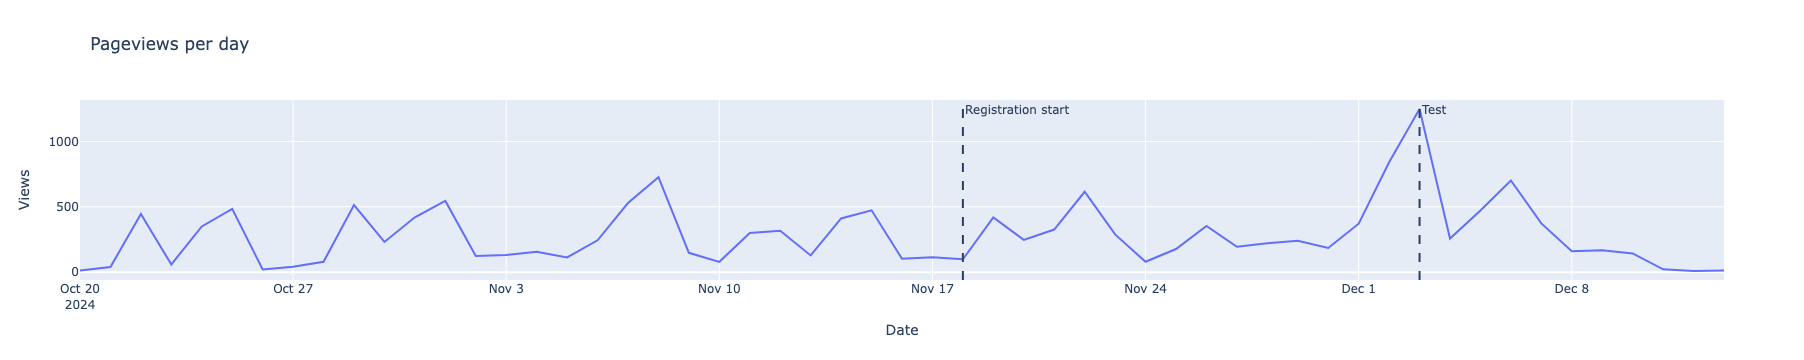

In [11]:
fig = px.line(
    views_by_day,
    y="Views",
    title="Pageviews per day",
)
add_important_dates(fig)
fig.show()

## Site-wide pageviews per week (total)


In [12]:
views_by_week = aggregate_by(analytics, "W")

# https://stackoverflow.com/a/19851521/358804
views_by_week.index.names = ["Week starting"]

views_by_week

,Views
Week starting,
2024-10-20,12
2024-10-27,1440
2024-11-03,2045
2024-11-10,1997
2024-11-17,1847
2024-11-24,2074
2024-12-01,1741
2024-12-08,4052


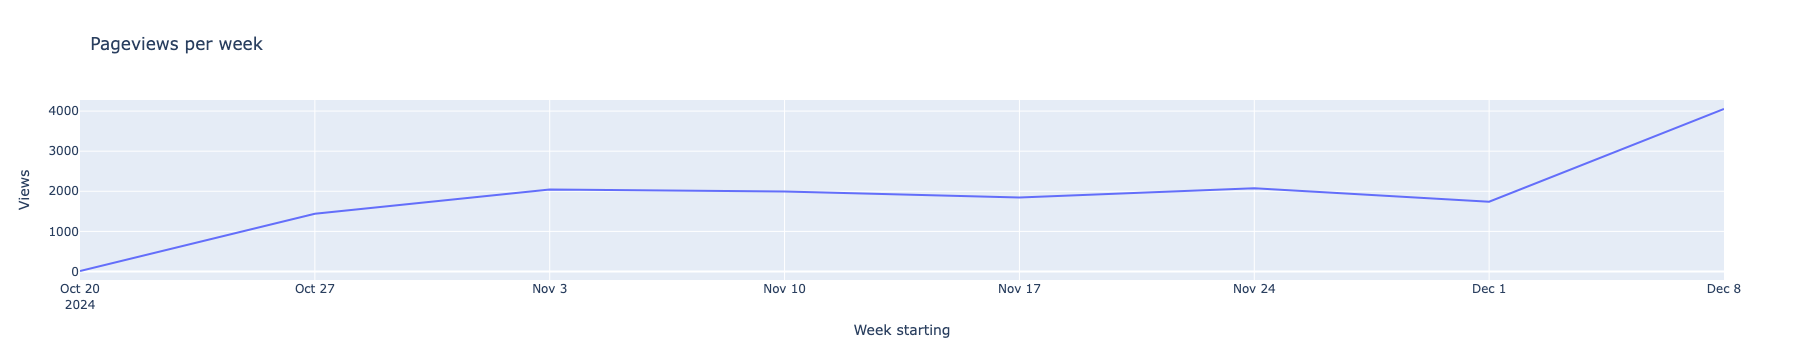

In [13]:
px.line(
    views_by_week,
    y="Views",
    title="Pageviews per week",
)